# Bias and Variance 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from math import radians
%matplotlib inline

## Question 4

$ E_D[(g^{D}(x)-f(x))^2] $  
define $\bar{g}(x) = E_D[g^{D}(x)]$  
for many data sets $D_1,D_2,...,D_k$  
$ \bar{g}(x)\approx \frac{1}{K} \sum_{k=1}^K g^{D_k}(x) $  

In [2]:
def f(x):
    return sin(radians(180*x))

In [3]:
def compute_a_D(x_1,x_2):
    #(f(x_1)-f(x_2))/(x_1-x_2) 直接用过两点的直线不可以，因为这样就假设了数据是线性分布。若每次抽样3个点，则肯定不行
    return (f(x_1)*x_1+f(x_2)*x_2)/(x_1**2 + x_2**2)

In [4]:
def compute_a_bar(K):
    a_bar = 0
    for i in range(0,K): 
        x_1 = random.uniform(-1,1)
        x_2 = random.uniform(-1,1)
        a_bar += compute_a_D(x_1,x_2)
    return a_bar/K

In [5]:
a_bar = compute_a_bar(100000)
print a_bar

1.43045866067


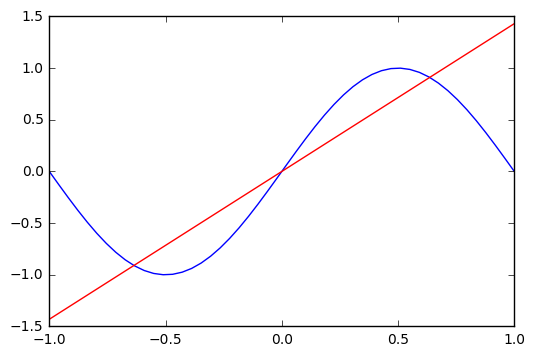

In [6]:
test = np.linspace(-1,1)
plt.plot(test,map(f,test),'b',[-1,1],[-a_bar,a_bar],'r')

## Question 5

$ E_D[(g^{D}(x)-f(x))^2] = E_D[(g^{(D)}(x) - \bar{g}(x))^2] + (\bar{g}(x) - f(x))^2 = variance(x) + bias(x)$  
$ bias =E_x(bias(x))= E_x((\bar{g}(x) - f(x))^2) $  
这里对x求期望，要使得x满足在-1，1上的均匀分布。可以均匀产生-1，1足够多的点，或者每次在-1，1之间选择一个点，重复多次

In [7]:
def bias(a,K):# With Dateset Irrelevant 

    bias = 0
    #for x in np.linspace(-1,1,10000):
     #   bias += (a*x - f(x))**2
    for i in range(0,K): 
        x = random.uniform(-1,1)
        bias += (a*x - f(x))**2
    print bias/K

In [8]:
bias(a_bar,10000)

0.276960352013


## Question 5

$ variance = E_x(var(x)) = E_x [E_D[(g^{(D)}(x) - \bar{g}(x))^2] ]$

In [9]:
def variance(a,K):
    var = 0
    for i in range(0,K): 
        x_1 = random.uniform(-1,1)
        x_2 = random.uniform(-1,1)
        g_D = compute_a_D(x_1,x_2)
        var += ((g_D*x_1 - a*x_1)**2 + (g_D*x_2 - a*x_2)**2)
    print var/(K*2)

In [10]:
variance(a_bar,10000)

0.204091518423
